# Imports

In [1]:
import numpy as np
import pandas as pd

# DataFrame from dict of Series or dicts 

In [4]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [5]:
pd.DataFrame(d, index=["d", "b", "a"])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [6]:
pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [7]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [8]:
df.columns

Index(['one', 'two'], dtype='object')

# DataFrame from dict of ndarrays / lists

In [9]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [10]:
pd.DataFrame(d, index=["a", "b", "c", "d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


# DataFrame from structured or record array

In [11]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])
data

array([(0, 0., b''), (0, 0., b'')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [12]:
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


# DataFrame from a list of dicts

In [13]:
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


# DataFrame from a dict of tuples

In [14]:
pd.DataFrame(
    {
        ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
        ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
        ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
        ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
        ("b", "b"): {("A", "D"): 9, ("A", "B"): 10},
    }
)

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

# DataFrame from a list of namedtuples

In [15]:
from collections import namedtuple

In [16]:
Point = namedtuple("Point", "x y")
Point3D = namedtuple("Point3D", "x y z")

In [19]:
pd.DataFrame([Point3D(0, 0, 0), Point3D(0, 3, 5), Point(2, 3)])

,x,y,z
0,0,0,0.0
1,0,3,5.0
2,2,3,NaN


# DataFrame from a list of dataclasses

In [20]:
from dataclasses import make_dataclass

In [21]:
PointD = make_dataclass("Point", [("x", int), ("y", int)])
pd.DataFrame([PointD(0, 0), PointD(0, 3), PointD(2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


# DataFrame from CSV file

In [45]:
csv = pd.read_csv("Machine Learning A-Z (Codes and Datasets)\Part 1 - Data Preprocessing\Section 2 -------------------- Part 1 - Data Preprocessing --------------------\Python\Data.csv")
csv

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


# Alternate constructors

In [24]:
pd.DataFrame.from_dict(
    dict([("A", [1, 2, 3]), ("B", [4, 5, 6])])
)

,A,B
0,1,4
1,2,5
2,3,6


In [25]:
pd.DataFrame.from_dict(
    dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]),
    orient="index",
    columns=["one", "two", "three"],
)

,one,two,three
A,1,2,3
B,4,5,6


In [26]:
pd.DataFrame.from_records(data, index="C")

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


# Indexing / selection

In [46]:
csv["Age"]

0    44.0
1    27.0
2    30.0
3    38.0
4    40.0
5    35.0
6     NaN
7    48.0
8    50.0
9    37.0
Name: Age, dtype: float64

In [57]:
csv.loc[1]

Country        Spain
Age             27.0
Salary       48000.0
Purchased        Yes
Name: 1, dtype: object

In [54]:
csv.iloc[3:-5]

,Country,Age,Salary,Purchased
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [55]:
csv[1:3]

,Country,Age,Salary,Purchased
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No


In [58]:
csv.iloc[:-1].values

array([['France', 44.0, 72000.0, 'No'],
       ['Spain', 27.0, 48000.0, 'Yes'],
       ['Germany', 30.0, 54000.0, 'No'],
       ['Spain', 38.0, 61000.0, 'No'],
       ['Germany', 40.0, nan, 'Yes'],
       ['France', 35.0, 58000.0, 'Yes'],
       ['Spain', nan, 52000.0, 'No'],
       ['France', 48.0, 79000.0, 'Yes'],
       ['Germany', 50.0, 83000.0, 'No']], dtype=object)

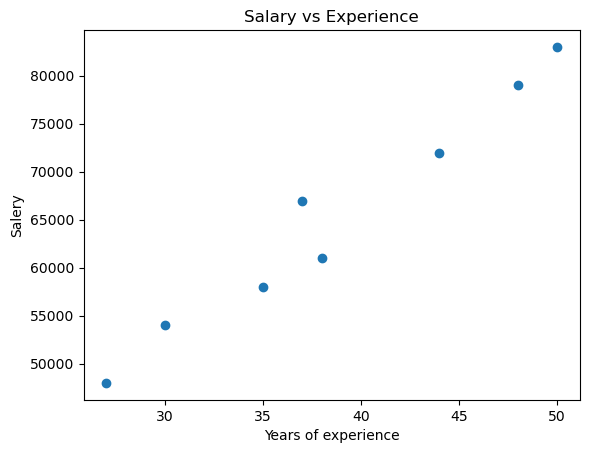

In [70]:
import matplotlib.pyplot as plt
plt.scatter(csv["Age"], csv["Salary"])
plt.title('Salary vs Experience')
plt.xlabel('Years of experience')
plt.ylabel('Salery')
plt.show()

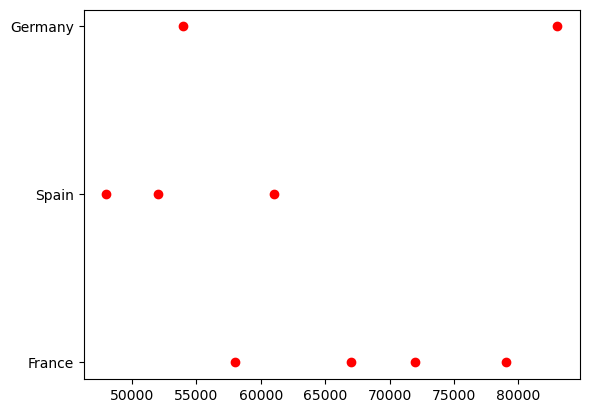

In [73]:
plt.scatter(csv["Salary"], csv["Country"], color="red")